# Exercise 4.8

In [204]:
%matplotlib inline
from matplotlib.pylab import plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.stats import chi2
import scipy

## Item a

### Load data

In [206]:
df = pd.read_table('heightWeightData.txt', header = None, sep=',')
df.columns = ['Genre', 'height', 'weight']
df.head()

,Genre,height,weight
0,1,67,125
1,2,68,140
2,2,67,142
3,2,60,110
4,2,64,97


### Remark

The exercise tell us that the second column is height and the third is weight. However, taking a quick look on the data, we see that it is just the opposite.

In [209]:
df.columns = ['Genre', 'weight', 'height']
df.describe().ix[:,'weight':]

,weight,height
count,210.000000,210.000000
mean,67.361905,145.657143
std,4.458471,32.694857
min,55.000000,95.000000
25%,64.000000,125.000000
50%,67.000000,140.000000
75%,71.000000,161.500000
max,79.000000,280.000000


### Separate males

In [226]:
males_df = df[df.Genre==1] # 1 corresponds to male
males_df = males_df.drop('Genre', 1) #All the rows are equal
males_df.describe()

,weight,height
count,73.000000,73.000000
mean,71.657534,175.616438
std,3.127917,32.398401
min,65.000000,125.000000
25%,70.000000,155.000000
50%,72.000000,170.000000
75%,73.000000,185.000000
max,79.000000,280.000000


### Calculate empirical statistics

Calculate the empirical statistics (mean and covariance matrix) in order to fit the bivariate Gaussian.

In [227]:
mu = males_df.mean()
cov = males_df.cov()

### Visualization

Plot data points together with Gaussian ellipse of the fitted data. The ellispse volume take 95,45 (mu +- 2sigma) of the mass of probability.

In [228]:
def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

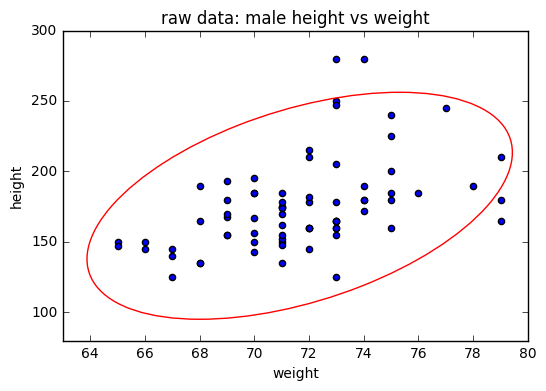

In [229]:
plt.scatter(males_df.weight, males_df.height)

ax = plt.gca()

vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

volume = 0.9545
width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)

ellipse = Ellipse(xy=mu, 
    width=width, 
    height=height,
    angle=theta,
    edgecolor='r', 
    fc='None', 
    lw=1)
ax.add_patch(ellipse)


plt.xlim([63, 80])
plt.xlabel('weight')
plt.ylim([80, 300])
plt.ylabel('height')
plt.title('raw data: male height vs weight')
plt.show()

## Item b

### Standardize the data

In [232]:
standard_df = (males_df - mu)/[cov.weight.weight**0.5, cov.height.height**0.5]
standard_mu = standard_df.mean()
standard_cov = standard_df.cov()
standard_df.describe()

,weight,height
count,7.300000e+01,7.300000e+01
mean,1.409831e-15,-3.361086e-16
std,1.000000e+00,1.000000e+00
min,-2.128424e+00,-1.562313e+00
25%,-5.299163e-01,-6.363412e-01
50%,1.094868e-01,-1.733554e-01
75%,4.291884e-01,2.896304e-01
max,2.347398e+00,3.221874e+00


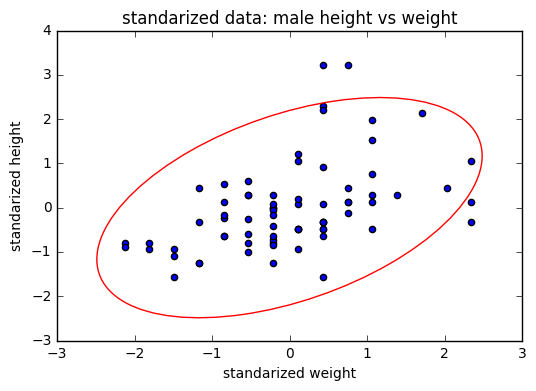

In [234]:
plt.scatter(standard_df.weight, standard_df.height)

ax = plt.gca()

vals, vecs = eigsorted(standard_cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

volume = 0.9545
width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)

ellipse = Ellipse(xy=standard_mu, 
    width=width, 
    height=height,
    angle=theta,
    edgecolor='r', 
    fc='None', 
    lw=1)
ax.add_patch(ellipse)


plt.xlim([-3, 3])
plt.xlabel('standarized weight')
plt.ylim([-3, 4])
plt.ylabel('standarized height')
plt.title('standarized data: male height vs weight')
plt.show()

## Item c

### Whitening the data

In [240]:
eigenvalues, U = np.linalg.eigh(standard_cov)
Lambda = np.diag(eigenvalues)
Lambda = scipy.linalg.sqrtm(Lambda)
Lambda = scipy.linalg.inv(Lambda) 

In [244]:
M = Lambda.dot(U.T) 
white_df = DataFrame(M.dot(standard_df.as_matrix().T))
white_df = white_df.T
white_df.columns = ['weight', 'height']

In [245]:
white_mu = white_df.mean()
white_cov = white_df.cov()

4.97195571422 4.97195571422


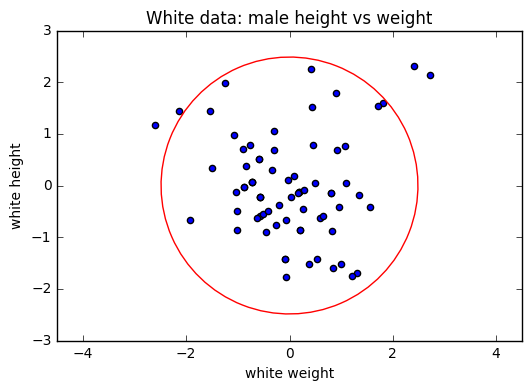

In [252]:
plt.scatter(white_df.weight, white_df.height)

ax = plt.gca()

vals, vecs = eigsorted(white_cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

volume = 0.9545
width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)

ellipse = Ellipse(xy=white_mu, 
    width=width, 
    height=height,
    angle=theta,
    edgecolor='r', 
    fc='None', 
    lw=1)
ax.add_patch(ellipse)

print(width, height)


plt.xlim([-3, 3])
plt.xlabel('white weight')
plt.ylim([-3, 3])
plt.ylabel('white height')
plt.title('White data: male height vs weight')
plt.axis("equal") #This is necessary to plot a circle
plt.show()

## Remark

As the author mentioned, the data points were rotaded in the 2D plane.